In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [5]:
#load data
data = pd.read_csv("C:\\Users\\PC\\OneDrive\\Desktop\\Wine Quality Prediction Model\\WineQT.csv")

In [6]:
data.head()
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [7]:
rows, columns = data.shape
print("Number of rows: ", rows)
print("Number of columns: ", columns)

Number of rows:  1143
Number of columns:  13


In [8]:
# Check the data types
print(data.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [9]:
#provides a concise summary of a DataFrame including the number of non-null values in each column, and the type of data they contain.
# This method is particularly useful for quickly understanding the structure and contents of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [10]:
#checking for null values
data.isnull().sum().sum()

np.int64(0)

In [11]:
#checking for duplicate values
data.duplicated().sum()

np.int64(0)

In [12]:
#carrying out some statistical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


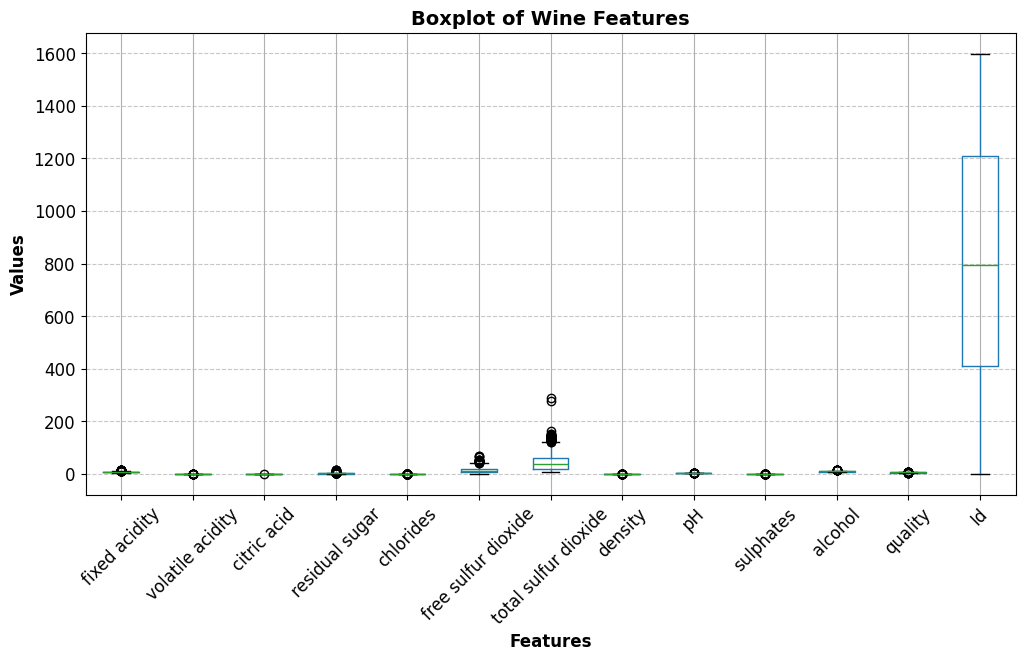

In [13]:

plt.figure(figsize=(12,6))  # Slightly larger figure
data.boxplot()

# Enhance labels
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for clarity
plt.yticks(fontsize=12)  # Increase y-axis font size
plt.title("Boxplot of Wine Features", fontsize=14, fontweight='bold')  # Add title
plt.xlabel("Features", fontsize=12, fontweight='bold')
plt.ylabel("Values", fontsize=12, fontweight='bold')

# Use a clean style
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()



fixed acidity: 44 outliers detected
volatile acidity: 14 outliers detected
citric acid: 1 outliers detected
residual sugar: 110 outliers detected
chlorides: 77 outliers detected
free sulfur dioxide: 18 outliers detected
total sulfur dioxide: 40 outliers detected
density: 36 outliers detected
pH: 20 outliers detected
sulphates: 43 outliers detected
alcohol: 12 outliers detected
quality: 22 outliers detected
Id: 0 outliers detected


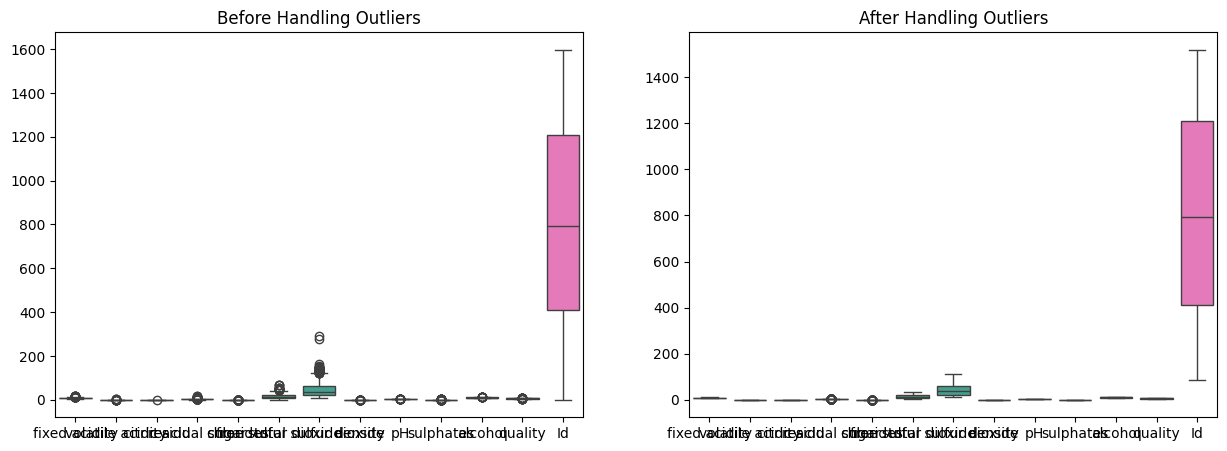

In [14]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns



# Identify numeric columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

# Function to detect and handle outliers using IQR + Winsorization
def handle_outliers(df, method="winsorize", limit=0.05):
    df_clean = df.copy()
    for col in num_cols:  # Loop through numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers detected")

        if method == "winsorize":
            # Winsorizing: Cap values at 5th and 95th percentiles
            df_clean[col] = winsorize(df[col], limits=[limit, limit])
        elif method == "remove":
            # Remove outliers completely
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Apply Winsorization to cap extreme values
data_clean = handle_outliers(data, method="winsorize", limit=0.05)

# Boxplot before and after handling outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=data, ax=axes[0])
axes[0].set_title("Before Handling Outliers")

sns.boxplot(data=data_clean, ax=axes[1])
axes[1].set_title("After Handling Outliers")

plt.show()
